This is a supplementary notebook for the paper "An extension of May's Theorem to three alternatives: axiomatizing Minimax voting" by Wesley H. Holliday (wesholliday@berkeley.edu) and Eric Pacuit (epacuit@umd.edu). It verifies some examples and claims from Footnotes 7-8, Remark 12, Proposition 14, Table 1, and Footnote 12.

In [1]:
#!pip3 install pref_voting

import pref_voting

from pref_voting.profiles import *
from pref_voting.voting_methods import *
from pref_voting.combined_methods import *
from pref_voting.margin_based_methods import *
from pref_voting.rankings import Ranking

from pref_voting.monotonicity_axioms import *
from pref_voting.variable_voter_axioms import *
from pref_voting.variable_candidate_axioms import *

from pref_voting.generate_profiles import generate_profile 
from pref_voting.generate_profiles import generate_truncated_profile 
from pref_voting.profiles import *
from pref_voting.voting_methods import *
from pref_voting.combined_methods import *

from tqdm.notebook import tqdm

In [2]:
# This notebook requires pref_voting version 0.5.30 or higher

print(pref_voting.__version__)

0.5.30


In [3]:
@vm(name = "Minimax")
def minimax(edata, curr_cands = None, strength_function = None):   
    """
    The Minimax winners are the candidates with the smallest maximum pairwise loss.  That is, for each candidate :math:`a`, find the biggest margin of a candidate :math:`b` over :math:`a`, then elect the candidate(s) with the smallest such loss. Also known as the Simpson-Kramer Rule.
    
    Args:
        edata (Profile, ProfileWithTies, MarginGraph): Any election data that has a `margin` method. 
        curr_cands (List[int], optional): If set, then find the winners for the profile restricted to the candidates in ``curr_cands``

    Returns: 
        A sorted list of candidates

    """

    candidates = edata.candidates if curr_cands is None else curr_cands    
    strength_function = edata.margin if strength_function is None else strength_function

    scores = {c: max([strength_function(_c, c) for _c in edata.dominators(c) if _c in candidates]) if any([_c in edata.dominators(c) for _c in candidates]) else 0 
              for c in candidates}
    min_score = min(scores.values())
    
    return sorted([c for c in candidates if scores[c] == min_score])

# Footnote 7

In [4]:
# This example shows that Bucklin violates block preservation

bucklin_prof = Profile([(0,1,2),(2,0,1)], rcounts = [1,3], cmap = {0:'a',1:'b',2:'c'})
bucklin_prof.display()
bucklin.display(bucklin_prof)
print("")
print("Adding a block of all linear orders:")
bucklin_prof_plus_block = Profile([(0,1,2),(2,0,1),(0,2,1), (1,0,2), (1,2,0), (2,1,0)], rcounts = [2,4,1,1,1,1], cmap = {0:'a',1:'b',2:'c'})
bucklin_prof_plus_block.display()
bucklin.display(bucklin_prof_plus_block)

+---+---+
| 1 | 3 |
+---+---+
| a | c |
| b | a |
| c | b |
+---+---+
Bucklin winner is {c}

Adding a block of all linear orders:
+---+---+---+---+---+---+
| 2 | 4 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| a | c | a | b | b | c |
| b | a | c | a | c | b |
| c | b | b | c | a | a |
+---+---+---+---+---+---+
Bucklin winner is {a}


In [5]:
# This example shows that Coombs violates block preservation

coombs_prof = Profile([(0,1,2), (2,1,0), (2,0,1), (1,0,2)], rcounts = [2,2,2,1], cmap = {0:'a',1:'b',2:'c'})
coombs_prof.display()
coombs.display(coombs_prof)
print("")
print("Adding a block of all linear orders:")
coombs_prof_plus_block = Profile([(0,1,2), (2,1,0), (2,0,1), (1,0,2), (0,2,1), (1,2,0)], rcounts = [3,3,3,2,1,1], cmap = {0:'a',1:'b',2:'c'})
coombs_prof_plus_block.display()
coombs.display(coombs_prof_plus_block)

+---+---+---+---+
| 2 | 2 | 2 | 1 |
+---+---+---+---+
| a | c | c | b |
| b | b | a | a |
| c | a | b | c |
+---+---+---+---+
Coombs winner is {c}

Adding a block of all linear orders:
+---+---+---+---+---+---+
| 3 | 3 | 3 | 2 | 1 | 1 |
+---+---+---+---+---+---+
| a | c | c | b | a | b |
| b | b | a | a | c | c |
| c | a | b | c | b | a |
+---+---+---+---+---+---+
Coombs winner is {a}


# Remark 12

In [6]:
@vm(name = "Support-Based Minimax")
def support_based_minimax(prof, curr_cands = None):   
    return minimax(prof, curr_cands = curr_cands, strength_function = prof.support)

+---+-----+---+
| 8 |  6  | 4 |
+---+-----+---+
| b |  a  | c |
| c | b c | a |
| a |     | b |
+---+-----+---+
Minimax winner is {b}
Support-Based Minimax winner is {c}

Margin graph:


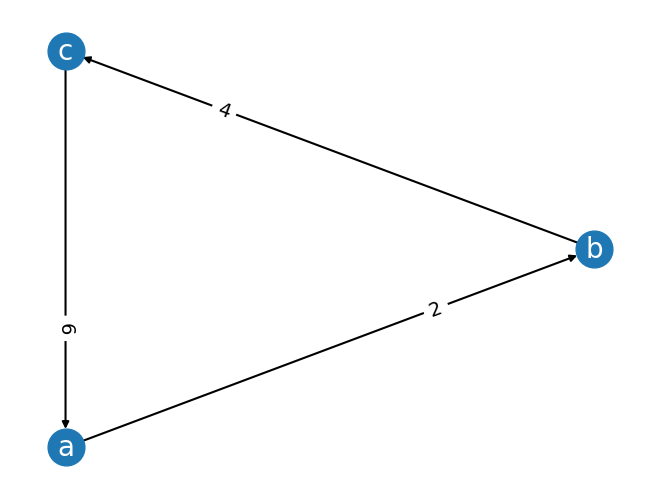

Support graph:


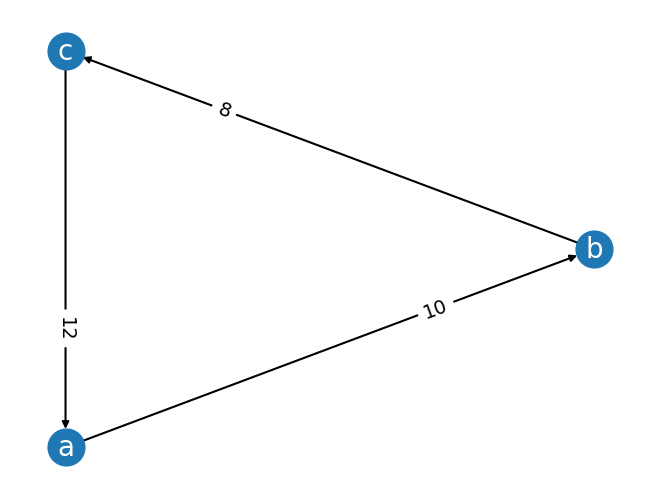

After adding 3 voters with the ranking cba:
+---+-----+---+---+
| 8 |  6  | 4 | 3 |
+---+-----+---+---+
| b |  a  | c | c |
| c | b c | a | b |
| a |     | b | a |
+---+-----+---+---+
Minimax winner is {b}
Support-Based Minimax winner is {b}

Margin graph:


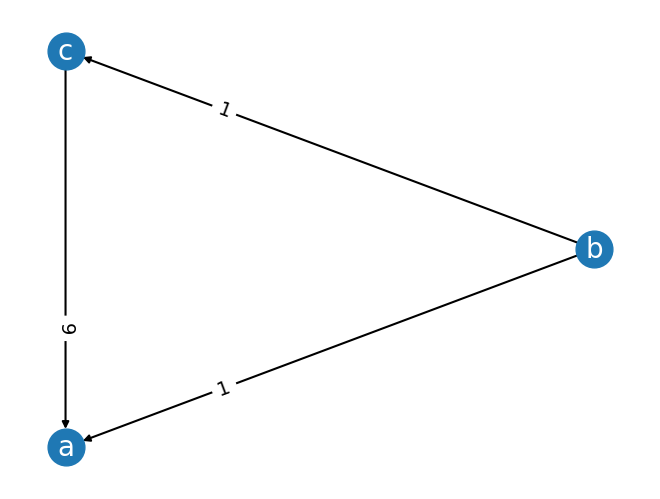

Support graph:


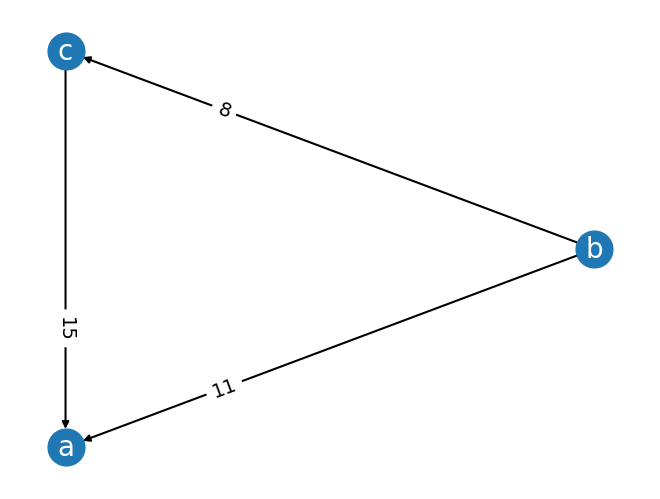

In [39]:
# This example shows that support-based Minimax violates positive involvement

P = ProfileWithTies([{0: 1, 1: 2, 2: 3}, {2: 1, 0:2, 1:2}, {1: 1, 2: 2, 0: 3}], rcounts=[8, 6, 4], cmap={0: 'b', 1: 'c', 2: 'a'})
P.use_extended_strict_preference()
P.display()
minimax.display(P)
support_based_minimax.display(P)
print("")
print("Margin graph:")
P.display_margin_graph()
print("Support graph:")
P.display_support_graph()

print("After adding 3 voters with the ranking cba:")

P_plus = ProfileWithTies([{0: 1, 1: 2, 2: 3}, {2: 1, 0:2, 1:2}, {1: 1, 2: 2, 0: 3}, {1:1, 0:2, 2: 3}], rcounts=[8, 6, 4, 3], cmap={0: 'b', 1: 'c', 2: 'a'})
P_plus.use_extended_strict_preference()
P_plus.display()
minimax.display(P_plus)
support_based_minimax.display(P_plus)
print("")
print("Margin graph:")
P_plus.display_margin_graph()
print("Support graph:")
P_plus.display_support_graph()

# Proposition 14: voting methods demonstrating independence of axioms

## Independence of neutrality

In [8]:
# This voting method demonstrates the independence of neutrality from the other axioms.

@vm(name = "First candidate")
def first_cand(edata, curr_cands = None, strength_function = None):   

    candidates = edata.candidates if curr_cands is None else curr_cands   
   
    return [sorted(candidates)[0]]

# Independence of positive involvement

In [9]:
# This voting method shows the independence of positive involvement from the other axioms.

@vm(name = "(Weak) Condorcet-Plurality")
def weak_condorcet_plurality(edata, curr_cands = None, strength_function = None):   

    curr_cands = edata.candidates if curr_cands is None else curr_cands  

    wcws = edata.weak_condorcet_winner(curr_cands = curr_cands) 

    if wcws is not None:
        return sorted(wcws)
    
    elif isinstance(edata, Profile):
        return plurality(edata, curr_cands = curr_cands)
    
    elif isinstance(edata, ProfileWithTies):

        rankings, rcounts = edata.rankings_counts

        plurality_scores = {cand: sum([c for r, c in zip(rankings, rcounts) if [cand] == r.first(cs=curr_cands)]) 
                for cand in curr_cands}
        max_plurality_score = max(plurality_scores.values())
        
        winners = [cand for cand in curr_cands if plurality_scores[cand] == max_plurality_score]

        return sorted(winners)

In [10]:
print("Violation of positive involvement for (Weak) Condorcet-Plurality:")
print("")
prof = Profile([(0,1,2), (1,2,0), (2,0,1),(2,1,0)], [4,4,3,2], cmap = {0: "a", 1: "b", 2: "c"})
prof.display()
weak_condorcet_plurality.display(prof)
print("")
prof_prime = Profile([(0,1,2), (1,2,0), (2,0,1),(2,1,0)], [4,4,3,3], cmap = {0: "a", 1: "b", 2: "c"})
prof_prime.display()
weak_condorcet_plurality.display(prof_prime)

Violation of positive involvement for (Weak) Condorcet-Plurality:

+---+---+---+---+
| 4 | 4 | 3 | 2 |
+---+---+---+---+
| a | b | c | c |
| b | c | a | b |
| c | a | b | a |
+---+---+---+---+
(Weak) Condorcet-Plurality winner is {c}

+---+---+---+---+
| 4 | 4 | 3 | 3 |
+---+---+---+---+
| a | b | c | c |
| b | c | a | b |
| c | a | b | a |
+---+---+---+---+
(Weak) Condorcet-Plurality winner is {b}


In [11]:
for num_voters in tqdm(range(2,40), leave=False):
    for n in range(10000):
        prof = generate_truncated_profile(3,num_voters)
        if has_immunity_to_spoilers_violation(prof, weak_condorcet_plurality, verbose = True):
            break

  0%|          | 0/38 [00:00<?, ?it/s]

In [12]:
for num_voters in tqdm(range(2,20), leave=False):
    #print(f"Checking {num_voters} voters")
    for n in range(10000):
        prof = generate_truncated_profile(3,num_voters)
        if has_weak_positive_responsiveness_violation(prof, weak_condorcet_plurality, verbose = True):
            break

  0%|          | 0/18 [00:00<?, ?it/s]

## Independence of inclusion homogeneity

In [13]:
# This method is used to show that inclusion homogeneity is independent of the other axioms.

@vm(name = "Close Call Minimax")
def close_call_minimax(edata, curr_cands = None, strength_function = None):   
   
    candidates = edata.candidates if curr_cands is None else curr_cands    
    strength_function = edata.margin if strength_function is None else strength_function
    
    mg = edata.margin_graph()

    scores = {c: max([strength_function(_c, c) for _c in edata.dominators(c)]) if len(edata.dominators(c)) > 0 else 0 
              for c in candidates}

    mm = minimax(edata, curr_cands = candidates, strength_function = strength_function)

    if len(edata.candidates) == 3 and len(set(scores.values())) == 3: # condition (I) is that each alternative has a unique score
        minimax_winner = mm[0]

        runner_up = sorted(scores, key = lambda c: scores[c])[1]
        # condition (II) is that the runner up is within 1 point of the minimax winner
        # condition (III) is that the runner up beats the minimax winner
        if scores[runner_up] - scores[minimax_winner] <= 1 and edata.margin(runner_up, minimax_winner) > 0:
            return [minimax_winner, runner_up]

    return mm

+-----+-----+---+---+
|  6  |  1  | 4 | 3 |
+-----+-----+---+---+
|  a  |  b  | b | c |
| b c | a c | c | a |
|     |     | a | b |
+-----+-----+---+---+


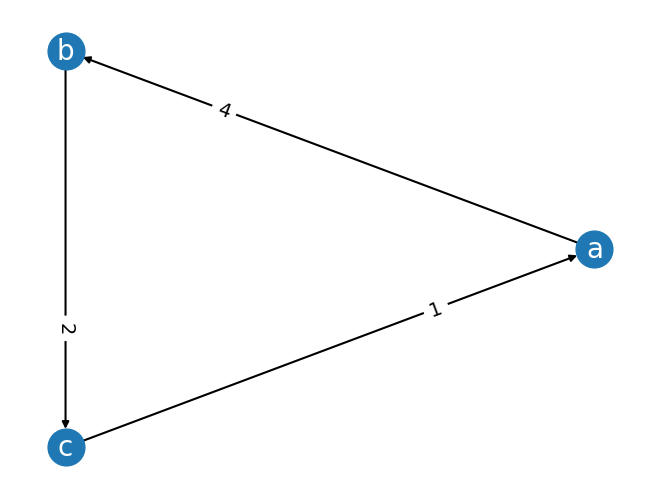

Minimax winner is {a}
Close Call Minimax winners are {a, c}

After doubling the profile:
+-----+-----+---+---+
| 12  |  2  | 8 | 6 |
+-----+-----+---+---+
|  a  |  b  | b | c |
| b c | a c | c | a |
|     |     | a | b |
+-----+-----+---+---+


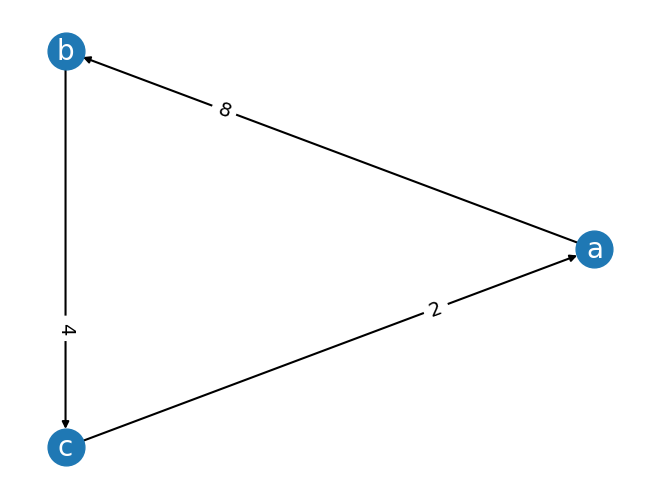

Minimax winner is {a}
Close Call Minimax winner is {a}


In [14]:
# A violation of inclusion homogeneity for Close Call Minimax:

p = ProfileWithTies([{0: 1, 1: 2, 2: 2}, {1: 1, 0: 2, 2: 2}, {1: 1, 2: 2, 0: 3}, {2: 1, 0:2, 1: 3}], rcounts=[6, 1, 4, 3], cmap={0: 'a', 1: 'b', 2: 'c'})
p.use_extended_strict_preference()
p.display()
p.display_margin_graph()
minimax.display(p)
close_call_minimax.display(p)
print("")
print("After doubling the profile:")
two_p = ProfileWithTies([{0: 1, 1: 2, 2: 2}, {1: 1, 0: 2, 2: 2}, {1: 1, 2: 2, 0: 3}, {2: 1, 0:2, 1: 3}], rcounts=[12, 2, 8, 6], cmap={0: 'a', 1: 'b', 2: 'c'})
two_p.use_extended_strict_preference()
two_p.display()
two_p.display_margin_graph()
minimax.display(two_p)
close_call_minimax.display(two_p)

In [15]:
for num_voters in tqdm(range(2,20), leave=False):
    #print(f"Checking {num_voters} voters")
    for coalition_size in range(1,num_voters//3 + 1):
        #print(f"Checking {coalition_size} voters to remove")
        for n in range(10000):
            prof = generate_truncated_profile(3,num_voters)
            if has_positive_involvement_violation(prof, close_call_minimax, uniform_coalition = False, coalition_size = coalition_size, verbose = True):
                break

  0%|          | 0/18 [00:00<?, ?it/s]

In [16]:
for num_voters in tqdm(range(2,20), leave=False):
    #print(f"Checking {num_voters} voters")
    for n in range(10000):
        prof = generate_truncated_profile(3,num_voters)
        if has_weak_positive_responsiveness_violation(prof, close_call_minimax, verbose = True):
            break

  0%|          | 0/18 [00:00<?, ?it/s]

## Independence of block preservation

In [17]:
# This method is used to show that block preservation is independent of the other axioms.

@vm(name = "Modified Minimax")
def modified_minimax(prof, curr_cands = None):   
   
    candidates = prof.candidates if curr_cands is None else curr_cands    

    mm = minimax(prof, curr_cands = candidates)

    mg = prof.margin_graph()

    if len(prof.candidates) == 3 and mg.has_cycle():

        win_scores = {c: max([prof.margin(c, _c) for _c in prof.dominates(c)]) if len(prof.dominates(c)) > 0 else 0 for c in candidates}
        max_score = max(win_scores.values())

        if any([c for c in candidates if c in mm and win_scores[c] == max_score]):
            y = [c for c in candidates if c in mm and win_scores[c] == max_score][0]
            x = prof.dominators(y)[0]
            z = prof.dominates(y)[0]

            if isinstance(prof, Profile) and 0 <= prof.margin(z, x) - prof.margin(x,y) and prof.margin(z, x) - prof.margin(x,y) < prof.margin(y,z) - prof.margin(z,x) and (y, x, z) not in prof.rankings:
                return [x]
            
            if isinstance(prof,ProfileWithTies) and 0 <= prof.margin(z, x) - prof.margin(x,y) and prof.margin(z, x) - prof.margin(x,y) < prof.margin(y,z) - prof.margin(z,x) and Ranking({y:1, x:2, z:3}) not in prof.rankings and Ranking({y:1, x:2}) not in prof.rankings:
                return [x]

    return mm

+---+---+---+
| 4 | 5 | 2 |
+---+---+---+
| x | y | z |
| y | z | x |
| z | x | y |
+---+---+---+


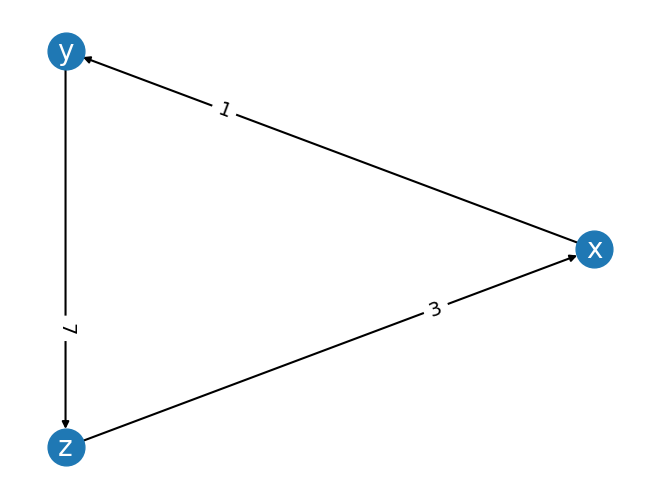

Minimax winner is {y}
Modified Minimax winner is {x}

After adding a block of all linear orders:
+---+---+---+---+---+---+
| 5 | 6 | 3 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| x | y | z | x | y | z |
| y | z | x | z | x | y |
| z | x | y | y | z | x |
+---+---+---+---+---+---+


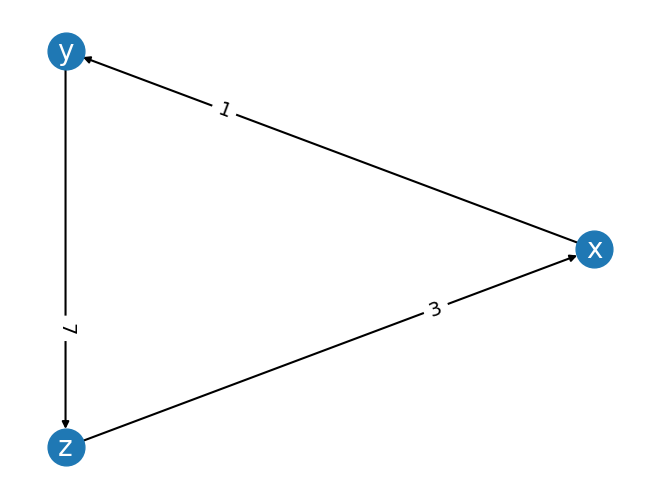

Minimax winner is {y}
Modified Minimax winner is {y}


In [18]:
# A violation of block preservation for Modified Minimax

prof = Profile([[0, 1, 2], [1, 2, 0], [2, 0, 1]], rcounts=[4,5,2], cmap={0: 'x', 1: 'y', 2: 'z'})
prof.display()
prof.display_margin_graph()
minimax.display(prof)
modified_minimax.display(prof)
print("")
print("After adding a block of all linear orders:")
prof_plus_block = Profile([[0, 1, 2], [1, 2, 0], [2, 0, 1], [0,2,1], [1,0,2], [2,1,0]], rcounts=[5,6,3,1,1,1], cmap={0: 'x', 1: 'y', 2: 'z'})
prof_plus_block.display()
prof_plus_block.display_margin_graph()
minimax.display(prof_plus_block)
modified_minimax.display(prof_plus_block)

In [19]:
for num_voters in tqdm(range(2,20), leave=False):
    #print(f"Checking {num_voters} voters")
    for coalition_size in range(1,num_voters//3 + 1):
        #print(f"Checking {coalition_size} voters to remove")
        for n in range(10000):
            prof = generate_truncated_profile(3,num_voters)
            if has_positive_involvement_violation(prof, modified_minimax, uniform_coalition = False, coalition_size = coalition_size, verbose = True):
                break


  0%|          | 0/18 [00:00<?, ?it/s]

In [20]:
for num_voters in tqdm(range(2,20), leave=False):
    #print(f"Checking {num_voters} voters")
    for n in range(10000):
        prof = generate_truncated_profile(3,num_voters)
        if has_weak_positive_responsiveness_violation(prof, modified_minimax, verbose = True):
            break

  0%|          | 0/18 [00:00<?, ?it/s]

# Independence of anonymity over arbitrary profiles from Footnote 8

In [21]:
# This method is used to show that anonymity is independent of the other axioms over arbitrary profiles (though it is not independent over non-knife-edged profiles, as shown by Proposition 13).

@vm(name = "Nonanon Minimax")
def nonanon_minimax(prof, curr_cands = None, strength_function = None):   
   
    candidates = prof.candidates if curr_cands is None else curr_cands    
    strength_function = prof.margin if strength_function is None else strength_function
    
    rs = prof.rankings
    
    # if the tuple rs[0] is the reverse of the tuple rs[1]

    if isinstance(prof, Profile) and prof.num_voters == 2 and rs[0][::-1] == rs[1]:
        return [int(rs[0][0])]
    
    if isinstance(prof, ProfileWithTies) and prof.num_voters == 2 and rs[0].ranks == rs[1].ranks and rs[0][0] == rs[1][-1] and rs[0][-1] == rs[1][0]:
        return [int(rs[0][0])]
    
    else:
        return minimax(prof, curr_cands = curr_cands, strength_function = strength_function)

In [22]:
test_prof = ProfileWithTies([{0:1, 1:2, 2:3}, {2:1, 1:2, 0:3} ])
test_prof.display()
print("Nonanon Minimax winners:", nonanon_minimax(test_prof))
print("Minimax winners:", minimax(test_prof))

print("")

test_prof_2 = ProfileWithTies([{0:1, 1:2, 2:3}, {2:1, 1:2, 0:3}, {0:1, 1:2, 2:3}, {2:1, 1:2, 0:3} ])
test_prof_2.display()
print("Nonanon Minimax winners:", nonanon_minimax(test_prof_2))
print("Minimax winners:", minimax(test_prof_2))

+---+---+
| 1 | 1 |
+---+---+
| 0 | 2 |
| 1 | 1 |
| 2 | 0 |
+---+---+
Nonanon Minimax winners: [0]
Minimax winners: [0, 1, 2]

+---+---+---+---+
| 1 | 1 | 1 | 1 |
+---+---+---+---+
| 0 | 2 | 0 | 2 |
| 1 | 1 | 1 | 1 |
| 2 | 0 | 2 | 0 |
+---+---+---+---+
Nonanon Minimax winners: [0, 1, 2]
Minimax winners: [0, 1, 2]


In [23]:
for n in range(100000):
    prof = generate_truncated_profile(3,2)
    
    if has_immunity_to_spoilers_violation(prof, nonanon_minimax, verbose = True):
        break

In [24]:
for num_voters in tqdm(range(2,4), leave=False):
    #print(f"Checking {num_voters} voters")
    for coalition_size in [1,2]:
        #print(f"Checking {coalition_size} voters to remove")
        for n in range(10000):
            prof = generate_truncated_profile(3,num_voters)
            if has_positive_involvement_violation(prof, nonanon_minimax, uniform_coalition = False, coalition_size = coalition_size, verbose = True):
                break

  0%|          | 0/2 [00:00<?, ?it/s]

In [25]:
for num_voters in tqdm(range(2,4), leave=False):
    #print(f"Checking {num_voters} voters")
    for coalition_size in [1,2]:
        #print(f"Checking {coalition_size} voters to remove")
        for n in range(10000):
            prof = generate_truncated_profile(3,num_voters)
            if has_weak_positive_responsiveness_violation(prof, nonanon_minimax, verbose = True):
                break

  0%|          | 0/2 [00:00<?, ?it/s]

# Table 1: violations of weak positive responsiveness by other voting methods

## Beat Path, 4 candidates

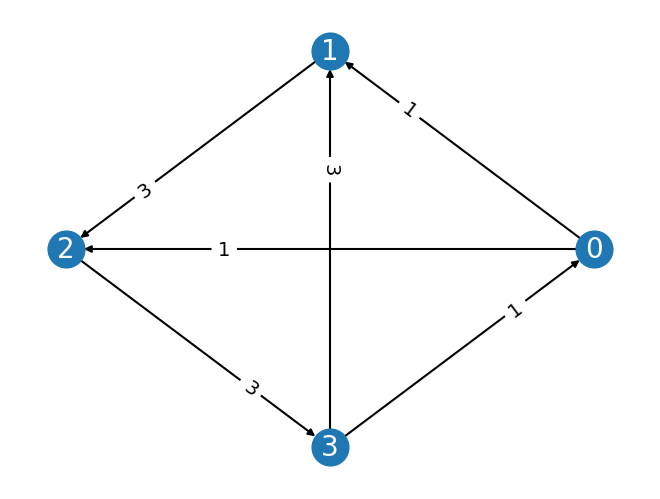

Weak positive responsiveness violation for Beat Path by lifting 1:
+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 2 | 3 | 3 | 0 | 2 | 0 | 0 |
| 2 | 2 | 0 | 1 | 1 | 3 | 3 | 2 | 1 |
| 3 | 3 | 3 | 0 | 0 | 1 | 0 | 3 | 2 |
| 0 | 0 | 1 | 2 | 2 | 2 | 1 | 1 | 3 |
+---+---+---+---+---+---+---+---+---+
Profile([[1, 2, 3, 0], [1, 2, 3, 0], [2, 0, 3, 1], [3, 1, 0, 2], [3, 1, 0, 2], [0, 3, 1, 2], [2, 3, 0, 1], [0, 2, 3, 1], [0, 1, 2, 3]], rcounts=[1, 1, 1, 1, 1, 1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


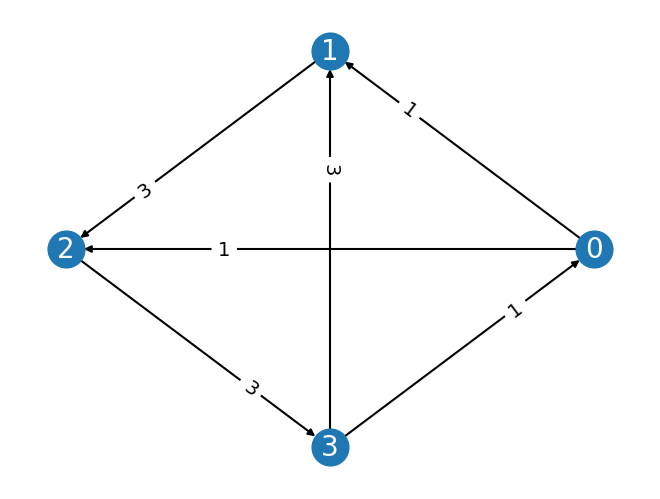

Beat Path winners:  [0, 1, 2, 3]
Original ranking:  (2, 0, 3, 1)
New ranking: (1, 2, 0, 3)
+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 2 | 3 | 3 | 0 | 2 | 0 | 0 | 1 |
| 2 | 2 | 0 | 1 | 1 | 3 | 3 | 2 | 1 | 2 |
| 3 | 3 | 3 | 0 | 0 | 1 | 0 | 3 | 2 | 0 |
| 0 | 0 | 1 | 2 | 2 | 2 | 1 | 1 | 3 | 3 |
+---+---+---+---+---+---+---+---+---+---+
Profile([[1, 2, 3, 0], [1, 2, 3, 0], [2, 0, 3, 1], [3, 1, 0, 2], [3, 1, 0, 2], [0, 3, 1, 2], [2, 3, 0, 1], [0, 2, 3, 1], [0, 1, 2, 3], [1, 2, 0, 3]], rcounts=[1, 1, 0, 1, 1, 1, 1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


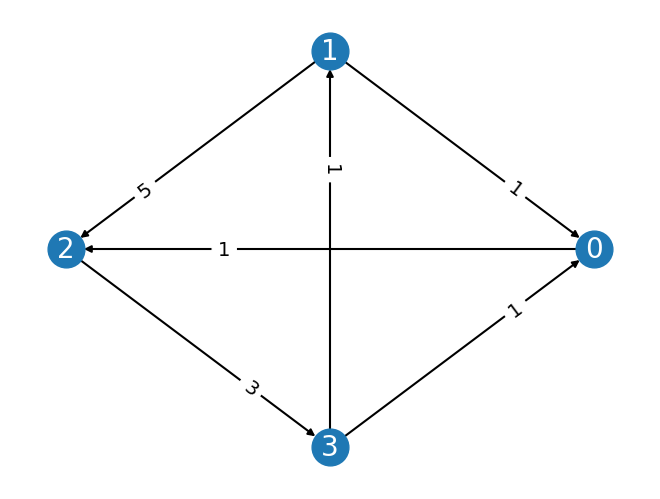

Beat Path winners in updated profile: [0, 1]


True

In [26]:
bpwpr = Profile([[1,2,3,0], [1,2,3,0], [2,0,3,1], [3,1,0,2],[3,1,0,2], [0,3,1,2], [2,3,0,1], [0,2,3,1], [0,1,2,3]])

bpwpr.display_margin_graph()

has_weak_positive_responsiveness_violation(bpwpr, beat_path, verbose = True)

## Ranked Pairs, 4 candidates

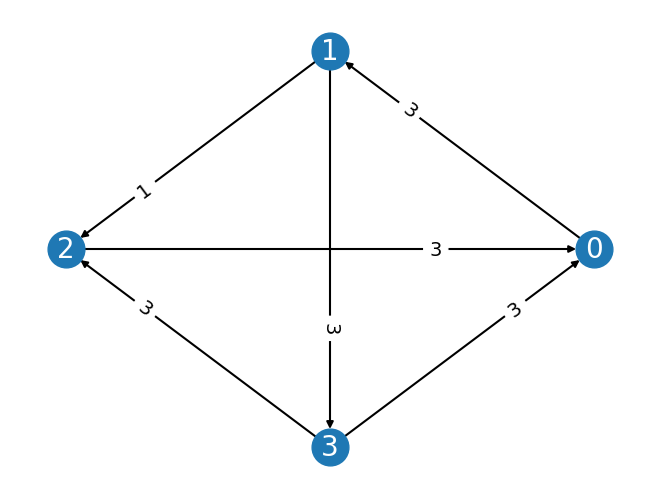

Weak positive responsiveness violation for Ranked Pairs by lifting 2:
+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+
| 3 | 1 | 1 | 0 | 0 | 2 | 3 | 1 | 2 |
| 0 | 3 | 3 | 1 | 1 | 3 | 2 | 2 | 0 |
| 2 | 2 | 2 | 3 | 3 | 0 | 0 | 3 | 1 |
| 1 | 0 | 0 | 2 | 2 | 1 | 1 | 0 | 3 |
+---+---+---+---+---+---+---+---+---+
Profile([[3, 0, 2, 1], [1, 3, 2, 0], [1, 3, 2, 0], [0, 1, 3, 2], [0, 1, 3, 2], [2, 3, 0, 1], [3, 2, 0, 1], [1, 2, 3, 0], [2, 0, 1, 3]], rcounts=[1, 1, 1, 1, 1, 1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


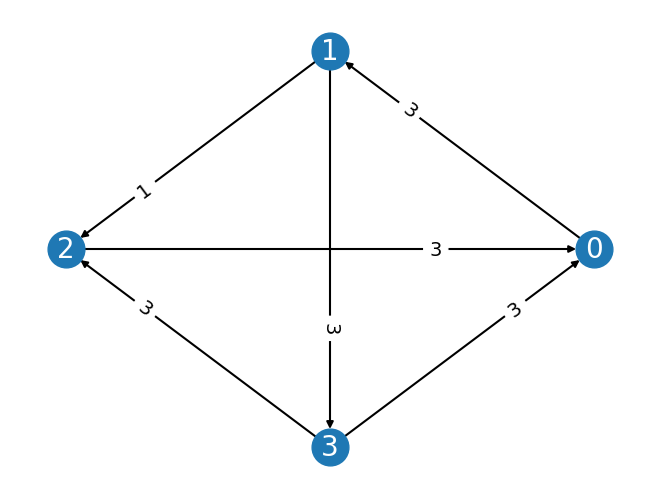

Ranked Pairs winners:  [0, 1, 2, 3]
Original ranking:  (0, 1, 3, 2)
New ranking: (2, 0, 1, 3)
+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 0 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+
| 3 | 1 | 1 | 0 | 0 | 2 | 3 | 1 | 2 | 2 |
| 0 | 3 | 3 | 1 | 1 | 3 | 2 | 2 | 0 | 0 |
| 2 | 2 | 2 | 3 | 3 | 0 | 0 | 3 | 1 | 1 |
| 1 | 0 | 0 | 2 | 2 | 1 | 1 | 0 | 3 | 3 |
+---+---+---+---+---+---+---+---+---+---+
Profile([[3, 0, 2, 1], [1, 3, 2, 0], [1, 3, 2, 0], [0, 1, 3, 2], [0, 1, 3, 2], [2, 3, 0, 1], [3, 2, 0, 1], [1, 2, 3, 0], [2, 0, 1, 3], [2, 0, 1, 3]], rcounts=[1, 1, 1, 0, 1, 1, 1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


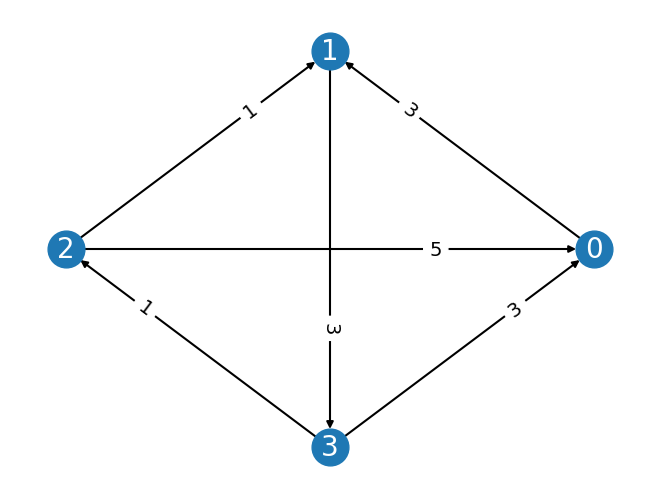

Ranked Pairs winners in updated profile: [1, 2, 3]


True

In [27]:
rpwpr = Profile ([[3,0,2,1], [1,3,2,0], [1,3,2,0], [0,1,3,2], [0,1,3,2], [2,3,0,1], [3,2,0,1], [1,2,3,0], [2,0,1,3]])

rpwpr.display_margin_graph()

has_weak_positive_responsiveness_violation(rpwpr, ranked_pairs, verbose=True)

## Split Cycle, 4 candidates

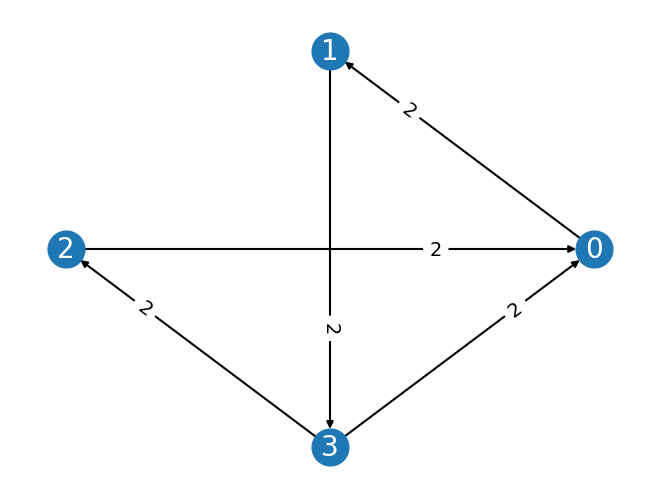

Weak positive responsiveness violation for Split Cycle by lifting 2:
+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 2 | 1 | 1 | 3 | 0 | 3 |
| 0 | 3 | 3 | 2 | 2 | 0 |
| 1 | 2 | 2 | 0 | 1 | 1 |
| 3 | 0 | 0 | 1 | 3 | 2 |
+---+---+---+---+---+---+
Profile([[2, 0, 1, 3], [1, 3, 2, 0], [1, 3, 2, 0], [3, 2, 0, 1], [0, 2, 1, 3], [3, 0, 1, 2]], rcounts=[1, 1, 1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


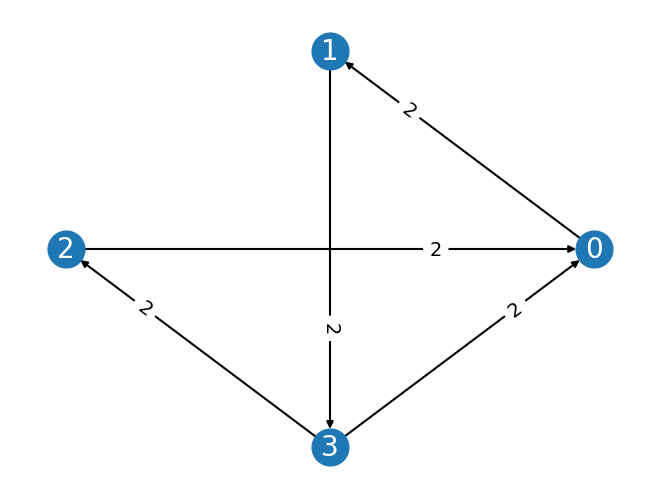

Split Cycle winners:  [0, 1, 2, 3]
Original ranking:  (3, 0, 1, 2)
New ranking: (2, 3, 0, 1)
+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 0 | 1 |
+---+---+---+---+---+---+---+
| 2 | 1 | 1 | 3 | 0 | 3 | 2 |
| 0 | 3 | 3 | 2 | 2 | 0 | 3 |
| 1 | 2 | 2 | 0 | 1 | 1 | 0 |
| 3 | 0 | 0 | 1 | 3 | 2 | 1 |
+---+---+---+---+---+---+---+
Profile([[2, 0, 1, 3], [1, 3, 2, 0], [1, 3, 2, 0], [3, 2, 0, 1], [0, 2, 1, 3], [3, 0, 1, 2], [2, 3, 0, 1]], rcounts=[1, 1, 1, 1, 1, 0, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


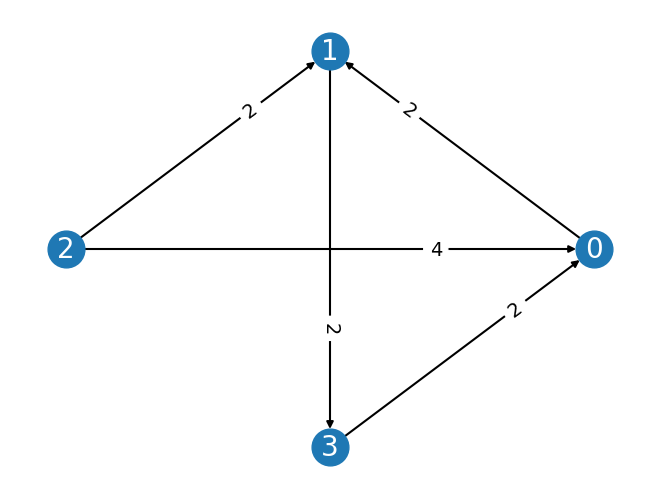

Split Cycle winners in updated profile: [2, 3]


True

In [28]:
scwpr = Profile([[2,0,1,3], [1,3,2,0], [1,3,2,0], [3,2,0,1], [0,2,1,3], [3,0,1,2]])

scwpr.display_margin_graph()

has_weak_positive_responsiveness_violation(scwpr, split_cycle, verbose=True)

## Stable Voting, 8 candidates

It is unknown whether Stable Voting violates weak positive responsiveness for 4 candidates. In general, violations of weak positive responsiveness by Stable Voting are extremely rare (e.g., 1 in 4,000,000 randomly sampled profiles in a recent search). The following is the only example we have found.

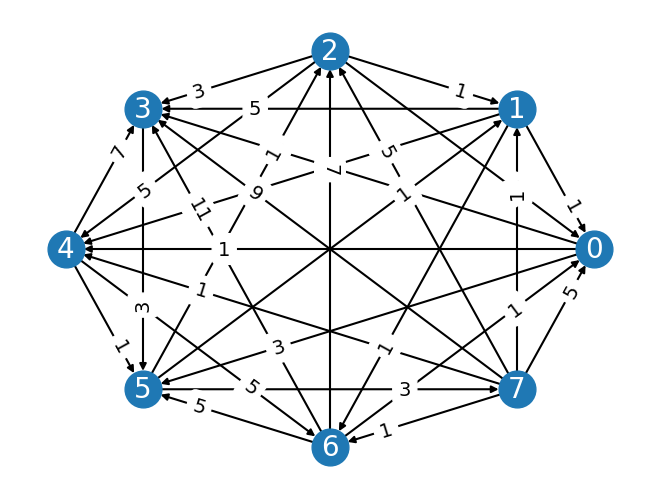

Weak positive responsiveness violation for Stable Voting by lifting 6:
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 0 | 4 | 7 | 1 | 6 | 6 | 0 | 5 | 5 | 1 | 6 | 0 | 1 | 2 | 4 | 7 | 2 | 1 | 1 | 2 |
| 2 | 5 | 7 | 4 | 5 | 3 | 5 | 6 | 1 | 7 | 6 | 0 | 5 | 4 | 0 | 0 | 2 | 4 | 4 | 6 | 4 |
| 6 | 7 | 6 | 6 | 7 | 5 | 7 | 3 | 0 | 0 | 2 | 1 | 7 | 6 | 3 | 7 | 3 | 5 | 7 | 3 | 7 |
| 5 | 1 | 0 | 2 | 2 | 7 | 2 | 5 | 6 | 4 | 4 | 4 | 2 | 2 | 4 | 6 | 0 | 6 | 0 | 7 | 6 |
| 7 | 4 | 3 | 3 | 3 | 2 | 1 | 2 | 3 | 6 | 7 | 7 | 4 | 5 | 5 | 2 | 5 | 1 | 6 | 0 | 1 |
| 4 | 3 | 5 | 0 | 0 | 1 | 0 | 4 | 2 | 3 | 3 | 3 | 3 | 0 | 1 | 1 | 1 | 3 | 3 | 2 | 3 |
| 3 | 6 | 2 | 1 | 4 | 4 | 4 | 7 | 7 | 1 | 0 | 5 | 1 | 7 | 7 | 3 | 4 | 7 | 5 | 4 | 5 |
| 0 | 2 | 1 | 5 | 6 | 0 | 3 | 1 | 4 | 2 | 5 | 2 | 6 | 3 | 6 | 5 | 6 |

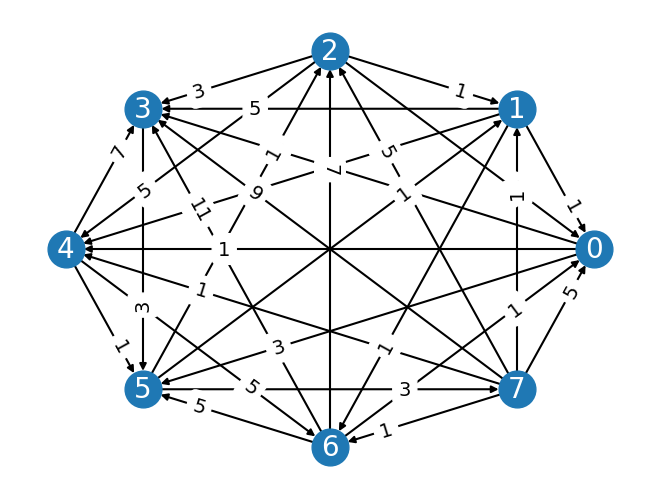

Stable Voting winners:  [6]
Original ranking:  (1, 5, 7, 2, 3, 0, 4, 6)
New ranking: (6, 1, 5, 7, 2, 3, 0, 4)
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 0 | 4 | 7 | 1 | 6 | 6 | 0 | 5 | 5 | 1 | 6 | 0 | 1 | 2 | 4 | 7 | 2 | 1 | 1 | 2 | 6 |
| 2 | 5 | 7 | 4 | 5 | 3 | 5 | 6 | 1 | 7 | 6 | 0 | 5 | 4 | 0 | 0 | 2 | 4 | 4 | 6 | 4 | 1 |
| 6 | 7 | 6 | 6 | 7 | 5 | 7 | 3 | 0 | 0 | 2 | 1 | 7 | 6 | 3 | 7 | 3 | 5 | 7 | 3 | 7 | 5 |
| 5 | 1 | 0 | 2 | 2 | 7 | 2 | 5 | 6 | 4 | 4 | 4 | 2 | 2 | 4 | 6 | 0 | 6 | 0 | 7 | 6 | 7 |
| 7 | 4 | 3 | 3 | 3 | 2 | 1 | 2 | 3 | 6 | 7 | 7 | 4 | 5 | 5 | 2 | 5 | 1 | 6 | 0 | 1 | 2 |
| 4 | 3 | 5 | 0 | 0 | 1 | 0 | 4 | 2 | 3 | 3 | 3 | 3 | 0 | 1 | 1 | 1 | 3 | 3 | 2 | 3 | 3 |
| 3 | 6 | 2 | 1 | 4 | 4 | 4 | 7 | 7 | 1 | 0 | 5 | 1 | 7 | 7 | 3 | 4 | 7 | 5 | 4 

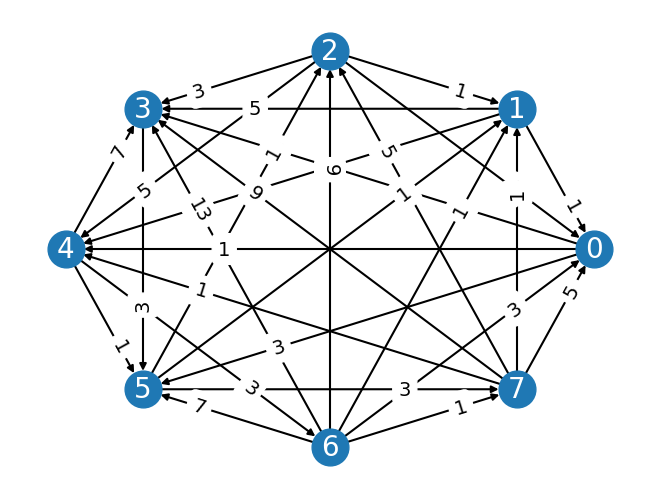

Stable Voting winners in updated profile: [7]


True

In [29]:
svwpr = Profile([[1, 2, 6, 5, 7, 4, 3, 0],
 [0, 5, 7, 1, 4, 3, 6, 2],
 [4, 7, 6, 0, 3, 5, 2, 1],
 [7, 4, 6, 2, 3, 0, 1, 5],
 [1, 5, 7, 2, 3, 0, 4, 6],
 [6, 3, 5, 7, 2, 1, 4, 0],
 [6, 5, 7, 2, 1, 0, 4, 3],
 [0, 6, 3, 5, 2, 4, 7, 1],
 [5, 1, 0, 6, 3, 2, 7, 4],
 [5, 7, 0, 4, 6, 3, 1, 2],
 [1, 6, 2, 4, 7, 3, 0, 5],
 [6, 0, 1, 4, 7, 3, 5, 2],
 [0, 5, 7, 2, 4, 3, 1, 6],
 [1, 4, 6, 2, 5, 0, 7, 3],
 [2, 0, 3, 4, 5, 1, 7, 6],
 [4, 0, 7, 6, 2, 1, 3, 5],
 [7, 2, 3, 0, 5, 1, 4, 6],
 [2, 4, 5, 6, 1, 3, 7, 0],
 [1, 4, 7, 0, 6, 3, 5, 2],
 [1, 6, 3, 7, 0, 2, 4, 5],
 [2, 4, 7, 6, 1, 3, 5, 0]])

svwpr.display_margin_graph()

has_weak_positive_responsiveness_violation(svwpr, stable_voting, verbose = True)

# Table 1: violations of positive involvement by other voting methods

## Beat Path, 4 candidates

2 loses in the full profile, but 2 is a winner after removing voter with the ranking (2, 1, 3, 0):

Full profile:
+---+---+---+---+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+
| 0 | 1 | 3 | 0 | 2 | 3 | 2 | 1 | 3 |
| 2 | 2 | 0 | 2 | 3 | 0 | 1 | 0 | 1 |
| 3 | 3 | 1 | 1 | 1 | 2 | 3 | 2 | 0 |
| 1 | 0 | 2 | 3 | 0 | 1 | 0 | 3 | 2 |
+---+---+---+---+---+---+---+---+---+
Profile([[0, 2, 3, 1], [1, 2, 3, 0], [3, 0, 1, 2], [0, 2, 1, 3], [2, 3, 1, 0], [3, 0, 2, 1], [2, 1, 3, 0], [1, 0, 2, 3], [3, 1, 0, 2]], rcounts=[1, 2, 1, 1, 1, 1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


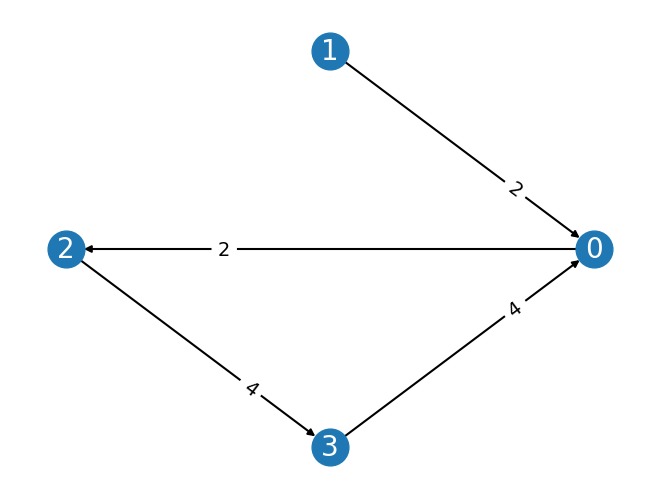

Beat Path winner is {1}

Profile with voter removed:
+---+---+---+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+
| 0 | 1 | 3 | 0 | 2 | 3 | 1 | 3 |
| 2 | 2 | 0 | 2 | 3 | 0 | 0 | 1 |
| 3 | 3 | 1 | 1 | 1 | 2 | 2 | 0 |
| 1 | 0 | 2 | 3 | 0 | 1 | 3 | 2 |
+---+---+---+---+---+---+---+---+
Profile([[0, 2, 3, 1], [1, 2, 3, 0], [3, 0, 1, 2], [0, 2, 1, 3], [2, 3, 1, 0], [3, 0, 2, 1], [1, 0, 2, 3], [3, 1, 0, 2]], rcounts=[1, 2, 1, 1, 1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


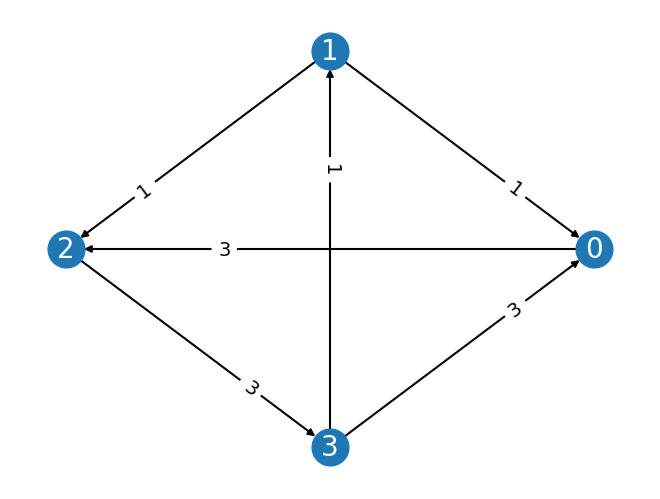

Beat Path winners are {0, 1, 2, 3}



True

In [30]:
bppi = Profile([[0, 2, 3, 1], [1, 2, 3, 0], [3, 0, 1, 2], [0, 2, 1, 3], [2, 3, 1, 0], [3, 0, 2, 1], [2, 1, 3, 0], [1, 0, 2, 3], [3, 1, 0, 2]], rcounts=[1, 2, 1, 1, 1, 1, 1, 1, 1])

has_positive_involvement_violation(bppi, beat_path, verbose = True)

# Kemeny, 4 candidates

1 loses in the full profile, but 1 is a winner after removing voter with the ranking (1, 3, 2, 0):

Full profile:
+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 1 | 0 | 3 | 2 | 1 |
| 3 | 3 | 1 | 0 | 2 |
| 2 | 1 | 2 | 3 | 0 |
| 0 | 2 | 0 | 1 | 3 |
+---+---+---+---+---+
Profile([[1, 3, 2, 0], [0, 3, 1, 2], [3, 1, 2, 0], [2, 0, 3, 1], [1, 2, 0, 3]], rcounts=[1, 1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


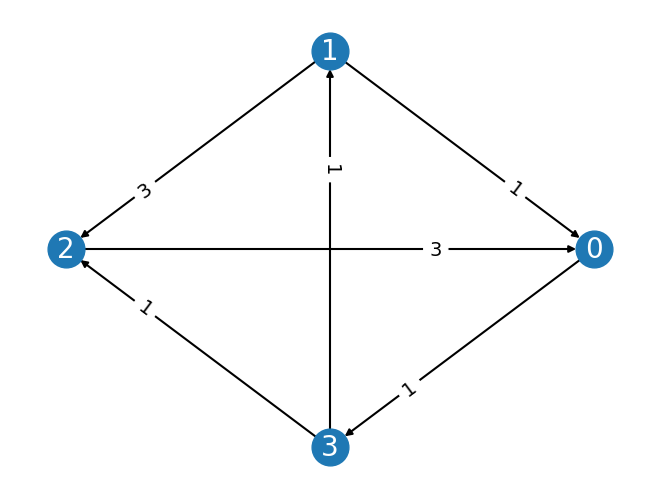

Kemeny-Young winner is {3}

Profile with voter removed:
+---+---+---+---+
| 1 | 1 | 1 | 1 |
+---+---+---+---+
| 0 | 3 | 2 | 1 |
| 3 | 1 | 0 | 2 |
| 1 | 2 | 3 | 0 |
| 2 | 0 | 1 | 3 |
+---+---+---+---+
Profile([[0, 3, 1, 2], [3, 1, 2, 0], [2, 0, 3, 1], [1, 2, 0, 3]], rcounts=[1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


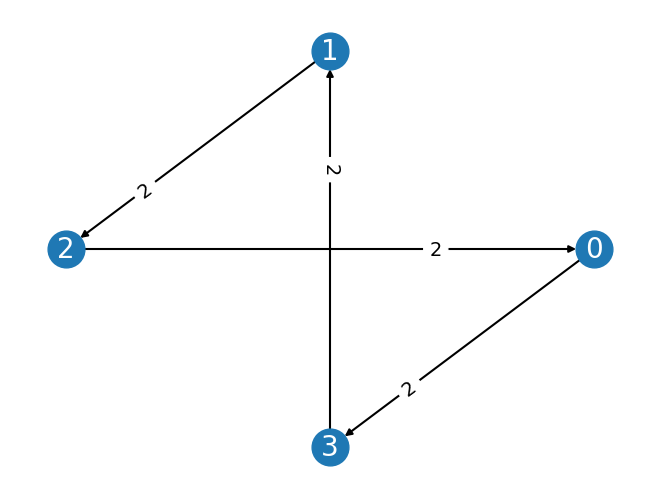

Kemeny-Young winners are {0, 1, 2, 3}



True

In [31]:
kmpi = Profile([[1, 3, 2, 0], [0, 3, 1, 2], [3, 1, 2, 0], [2, 0, 3, 1], [1, 2, 0, 3]], rcounts=[1, 1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})

has_positive_involvement_violation(kmpi, kemeny_young, verbose = True)

# Ranked Pairs, 4 candidates

2 loses in the full profile, but 2 is a winner after removing voter with the ranking (2, 1, 0, 3):

Full profile:
+---+---+---+---+---+---+
| 2 | 1 | 2 | 1 | 2 | 1 |
+---+---+---+---+---+---+
| 2 | 3 | 0 | 2 | 1 | 3 |
| 1 | 2 | 3 | 0 | 2 | 1 |
| 0 | 1 | 1 | 3 | 0 | 2 |
| 3 | 0 | 2 | 1 | 3 | 0 |
+---+---+---+---+---+---+
Profile([[2, 1, 0, 3], [3, 2, 1, 0], [0, 3, 1, 2], [2, 0, 3, 1], [1, 2, 0, 3], [3, 1, 2, 0]], rcounts=[2, 1, 2, 1, 2, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


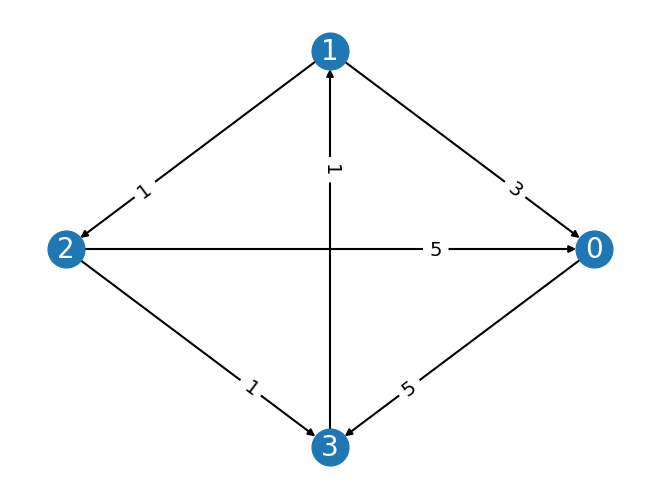

Ranked Pairs winner is {1}

Profile with voter removed:
+---+---+---+---+---+---+
| 1 | 1 | 2 | 1 | 2 | 1 |
+---+---+---+---+---+---+
| 2 | 3 | 0 | 2 | 1 | 3 |
| 1 | 2 | 3 | 0 | 2 | 1 |
| 0 | 1 | 1 | 3 | 0 | 2 |
| 3 | 0 | 2 | 1 | 3 | 0 |
+---+---+---+---+---+---+
Profile([[2, 1, 0, 3], [3, 2, 1, 0], [0, 3, 1, 2], [2, 0, 3, 1], [1, 2, 0, 3], [3, 1, 2, 0]], rcounts=[1, 1, 2, 1, 2, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


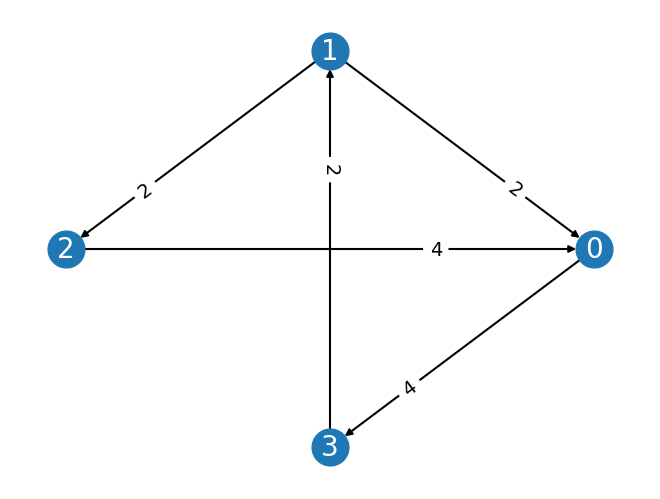

Ranked Pairs winners are {1, 2}



True

In [32]:
rppi = Profile([[2, 1, 0, 3], [3, 2, 1, 0], [0, 3, 1, 2], [2, 0, 3, 1], [1, 2, 0, 3], [3, 1, 2, 0]], rcounts=[2, 1, 2, 1, 2, 1])

has_positive_involvement_violation(rppi, ranked_pairs, verbose = True)

# Stable Voting, 4 candidates

1 loses in the full profile, but 1 is a winner after removing voter with the ranking (1, 2, 0, 3):

Full profile:
+---+---+---+---+---+---+
| 2 | 1 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 3 | 2 | 1 | 2 | 0 | 1 |
| 2 | 1 | 0 | 0 | 3 | 2 |
| 1 | 0 | 3 | 3 | 2 | 0 |
| 0 | 3 | 2 | 1 | 1 | 3 |
+---+---+---+---+---+---+
Profile([[3, 2, 1, 0], [2, 1, 0, 3], [1, 0, 3, 2], [2, 0, 3, 1], [0, 3, 2, 1], [1, 2, 0, 3]], rcounts=[2, 1, 2, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


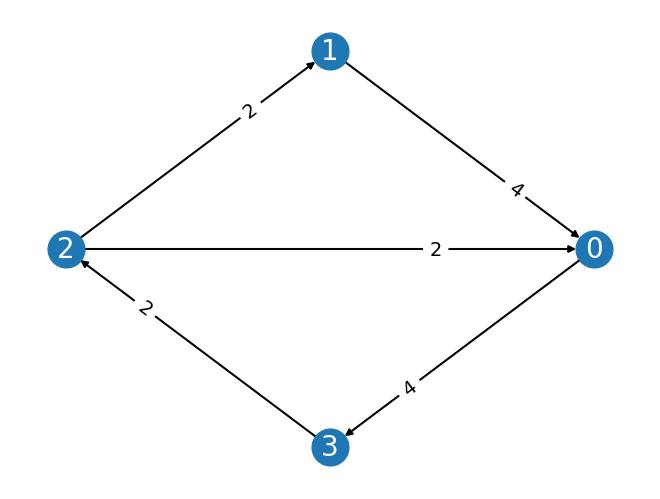

Stable Voting winner is {2}

Profile with voter removed:
+---+---+---+---+---+
| 2 | 1 | 2 | 1 | 1 |
+---+---+---+---+---+
| 3 | 2 | 1 | 2 | 0 |
| 2 | 1 | 0 | 0 | 3 |
| 1 | 0 | 3 | 3 | 2 |
| 0 | 3 | 2 | 1 | 1 |
+---+---+---+---+---+
Profile([[3, 2, 1, 0], [2, 1, 0, 3], [1, 0, 3, 2], [2, 0, 3, 1], [0, 3, 2, 1]], rcounts=[2, 1, 2, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


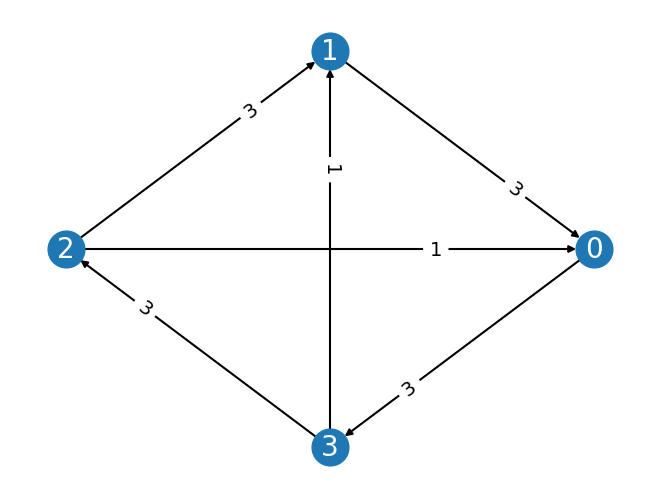

Stable Voting winners are {0, 1, 2, 3}



True

In [33]:
svpi = Profile([[3, 2, 1, 0], [2, 1, 0, 3], [1, 0, 3, 2], [2, 0, 3, 1], [0, 3, 2, 1], [1, 2, 0, 3]], rcounts=[2, 1, 2, 1, 1, 1])

has_positive_involvement_violation(svpi, stable_voting, verbose = True)

# Table 1: violations of immunity to spoilers by other voting methods

## Beat Path, 5 candidates, non-knife-edged

Immunity to Spoilers violation for Beat Path.
2 wins without 1 in the election and is majority preferred to 1 but both lose when 1 is included:
+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 9 | 1 | 4 | 8 | 4 | 3 | 1 | 3 | 9 | 3 |
+---+---+---+---+---+---+---+---+---+---+---+
| 0 | 0 | 1 | 1 | 1 | 2 | 2 | 2 | 3 | 3 | 4 |
| 1 | 2 | 2 | 3 | 4 | 3 | 4 | 4 | 1 | 2 | 0 |
| 2 | 4 | 4 | 4 | 0 | 1 | 1 | 3 | 0 | 1 | 3 |
| 3 | 3 | 3 | 0 | 2 | 4 | 0 | 0 | 2 | 4 | 1 |
| 4 | 1 | 0 | 2 | 3 | 0 | 3 | 1 | 4 | 0 | 2 |
+---+---+---+---+---+---+---+---+---+---+---+
Profile([[0, 1, 2, 3, 4], [0, 2, 4, 3, 1], [1, 2, 4, 3, 0], [1, 3, 4, 0, 2], [1, 4, 0, 2, 3], [2, 3, 1, 4, 0], [2, 4, 1, 0, 3], [2, 4, 3, 0, 1], [3, 1, 0, 2, 4], [3, 2, 1, 4, 0], [4, 0, 3, 1, 2]], rcounts=[1, 9, 1, 4, 8, 4, 3, 1, 3, 9, 3], cmap={0: '0', 1: '1', 2: '2', 3: '3', 4: '4'})


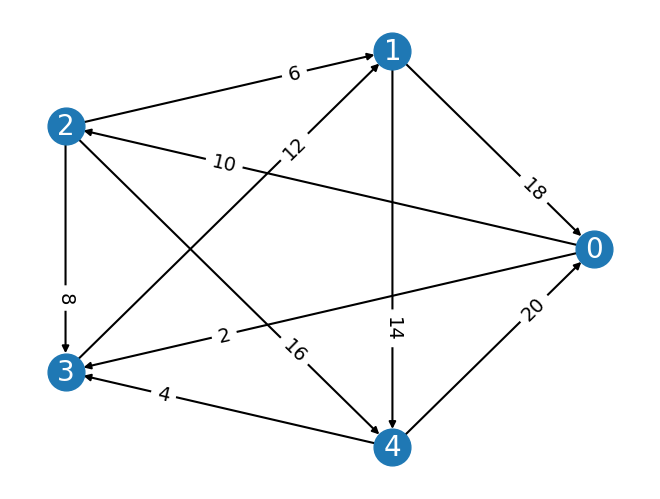

Winners in full election: [3]
Winners in election without 1: [2]


True

In [34]:
bpis = Profile([[0, 1, 2, 3, 4], [0, 2, 4, 3, 1], [1, 2, 4, 3, 0], [1, 3, 4, 0, 2], [1, 4, 0, 2, 3], [2, 3, 1, 4, 0], [2, 4, 1, 0, 3], [2, 4, 3, 0, 1], [3, 1, 0, 2, 4], [3, 2, 1, 4, 0], [4, 0, 3, 1, 2]], rcounts=[1, 9, 1, 4, 8, 4, 3, 1, 3, 9, 3])

has_immunity_to_spoilers_violation(bpis, beat_path, verbose = True)

# Kemeny-Young, 4 candidates, non-knife-edged

Immunity to Spoilers violation for Kemeny-Young.
1 wins without 2 in the election and is majority preferred to 2 but both lose when 2 is included:
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 3 | 4 | 5 | 2 | 1 | 3 | 1 | 2 | 2 | 4 | 1 | 1 | 4 | 2 | 1 | 1 | 1 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 2 | 1 | 1 | 1 | 2 | 2 | 0 | 1 | 3 | 0 | 3 | 3 | 3 | 3 | 1 | 2 | 0 | 0 | 2 | 0 |
| 3 | 0 | 2 | 3 | 0 | 1 | 0 | 1 | 0 | 1 | 3 | 2 | 1 | 2 | 0 | 2 | 3 | 3 | 2 | 3 | 1 |
| 2 | 3 | 0 | 0 | 2 | 0 | 1 | 3 | 3 | 0 | 1 | 0 | 2 | 1 | 1 | 3 | 0 | 2 | 3 | 1 | 2 |
| 0 | 1 | 3 | 2 | 3 | 3 | 3 | 2 | 2 | 2 | 2 | 1 | 0 | 0 | 2 | 0 | 1 | 1 | 1 | 0 | 3 |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
Profile([[1, 3, 2, 0], [2, 0, 3, 1], [1, 2, 0, 3], [1, 3, 0, 2], [1, 0, 2, 3], [2, 1, 0, 3], [2, 0, 1, 3], [0, 1, 3, 2], [1, 0, 3, 2], [3, 1, 0, 2], [0, 3, 1, 2], [3

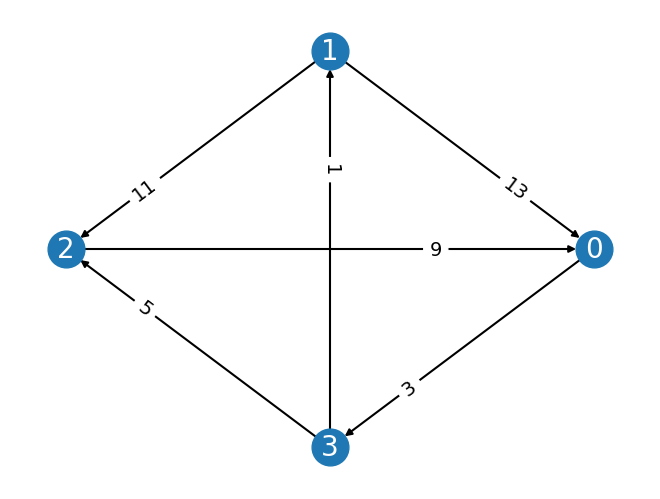

Winners in full election: [3]
Winners in election without 2: [1]


True

In [35]:
kmis = Profile([[1, 3, 2, 0], [2, 0, 3, 1], [1, 2, 0, 3], [1, 3, 0, 2], [1, 0, 2, 3], [2, 1, 0, 3], [2, 0, 1, 3], [0, 1, 3, 2], [1, 0, 3, 2], [3, 1, 0, 2], [0, 3, 1, 2], [3, 2, 0, 1], [3, 1, 2, 0], [3, 2, 1, 0], [3, 0, 1, 2], [1, 2, 3, 0], [2, 3, 0, 1], [0, 3, 2, 1], [0, 2, 3, 1], [2, 3, 1, 0], [0, 1, 2, 3]], rcounts=[3, 4, 5, 2, 1, 3, 1, 2, 2, 4, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})

has_immunity_to_spoilers_violation(kmis, kemeny_young, verbose = True)

## Ranked Pairs, 4 candidates, non-knife-edged

Immunity to Spoilers violation for Ranked Pairs.
1 wins without 3 in the election and is majority preferred to 3 but both lose when 3 is included:
+---+---+---+---+---+
| 7 | 2 | 5 | 3 | 1 |
+---+---+---+---+---+
| 0 | 1 | 1 | 2 | 2 |
| 1 | 2 | 3 | 0 | 1 |
| 3 | 0 | 2 | 3 | 0 |
| 2 | 3 | 0 | 1 | 3 |
+---+---+---+---+---+
Profile([[0, 1, 3, 2], [1, 2, 0, 3], [1, 3, 2, 0], [2, 0, 3, 1], [2, 1, 0, 3]], rcounts=[7, 2, 5, 3, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


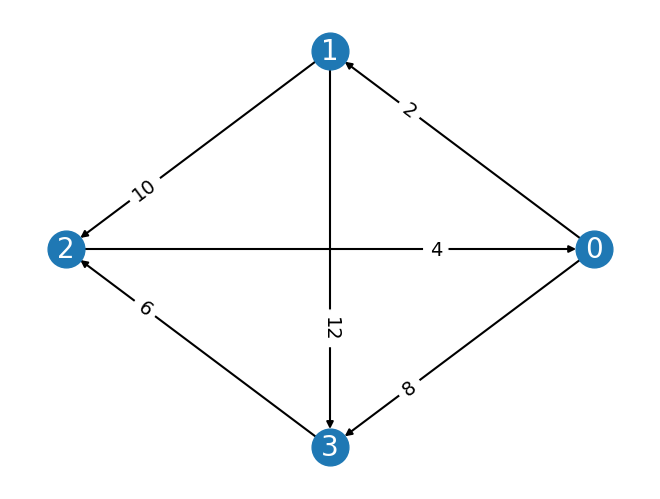

Winners in full election: [0]
Winners in election without 3: [1]


True

In [36]:
rpis = Profile([[0, 1, 3, 2], [1, 2, 0, 3], [1, 3, 2, 0], [2, 0, 3, 1], [2, 1, 0, 3]], rcounts=[7, 2, 5, 3, 1])

has_immunity_to_spoilers_violation(rpis, ranked_pairs, verbose = True)

## Stable Voting, 4-candidates, non-knife-edged

Immunity to Spoilers violation for Stable Voting.
0 wins without 3 in the election and is majority preferred to 3 but both lose when 3 is included:
+---+---+---+---+---+---+
| 5 | 7 | 9 | 3 | 3 | 1 |
+---+---+---+---+---+---+
| 0 | 0 | 1 | 2 | 2 | 3 |
| 2 | 3 | 2 | 0 | 3 | 1 |
| 3 | 1 | 3 | 3 | 0 | 2 |
| 1 | 2 | 0 | 1 | 1 | 0 |
+---+---+---+---+---+---+
Profile([[0, 2, 3, 1], [0, 3, 1, 2], [1, 2, 3, 0], [2, 0, 3, 1], [2, 3, 0, 1], [3, 1, 2, 0]], rcounts=[5, 7, 9, 3, 3, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


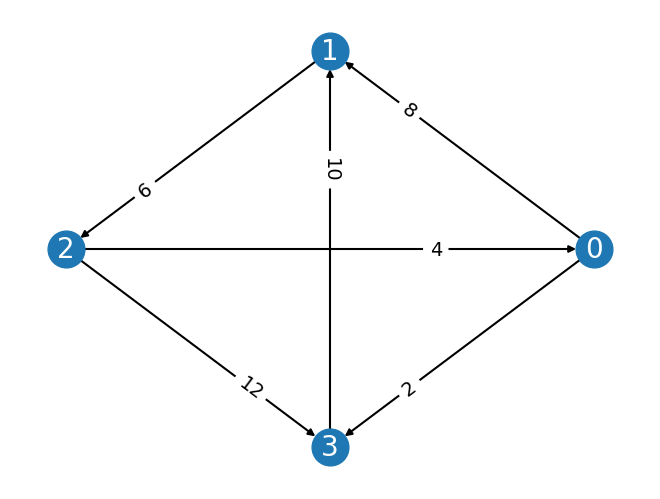

Winners in full election: [2]
Winners in election without 3: [0]


True

In [37]:
svis = Profile([[0, 2, 3, 1], [0, 3, 1, 2], [1, 2, 3, 0], [2, 0, 3, 1], [2, 3, 0, 1], [3, 1, 2, 0]], rcounts=[5, 7, 9, 3, 3, 1])

has_immunity_to_spoilers_violation(svis, stable_voting, verbose = True)

# Footnote 12: violation of Positive Involvement by Smith-Minimax

1 loses in the full profile, but 1 is a winner after removing 6 voters with the ranking (1, 0, 2, 3):

Full profile:
+---+---+----+---+----+----+---+
| 3 | 4 | 15 | 1 | 11 | 17 | 6 |
+---+---+----+---+----+----+---+
| 0 | 0 | 1  | 2 | 2  | 3  | 1 |
| 1 | 2 | 2  | 0 | 3  | 0  | 0 |
| 2 | 3 | 0  | 3 | 1  | 1  | 2 |
| 3 | 1 | 3  | 1 | 0  | 2  | 3 |
+---+---+----+---+----+----+---+
Profile([[0, 1, 2, 3], [0, 2, 3, 1], [1, 2, 0, 3], [2, 0, 3, 1], [2, 3, 1, 0], [3, 0, 1, 2], [1, 0, 2, 3]], rcounts=[3, 4, 15, 1, 11, 17, 6], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


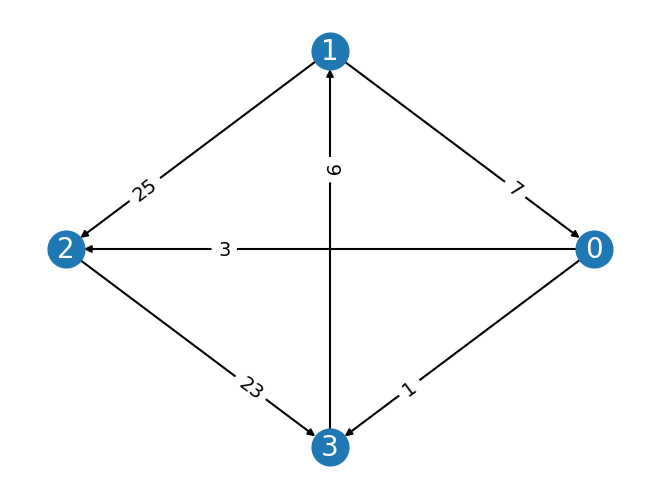

Smith-Minimax winner is {0}

Profile with 6 voters removed:
+---+---+----+---+----+----+
| 3 | 4 | 15 | 1 | 11 | 17 |
+---+---+----+---+----+----+
| 0 | 0 | 1  | 2 | 2  | 3  |
| 1 | 2 | 2  | 0 | 3  | 0  |
| 2 | 3 | 0  | 3 | 1  | 1  |
| 3 | 1 | 3  | 1 | 0  | 2  |
+---+---+----+---+----+----+
Profile([[0, 1, 2, 3], [0, 2, 3, 1], [1, 2, 0, 3], [2, 0, 3, 1], [2, 3, 1, 0], [3, 0, 1, 2]], rcounts=[3, 4, 15, 1, 11, 17], cmap={0: '0', 1: '1', 2: '2', 3: '3'})


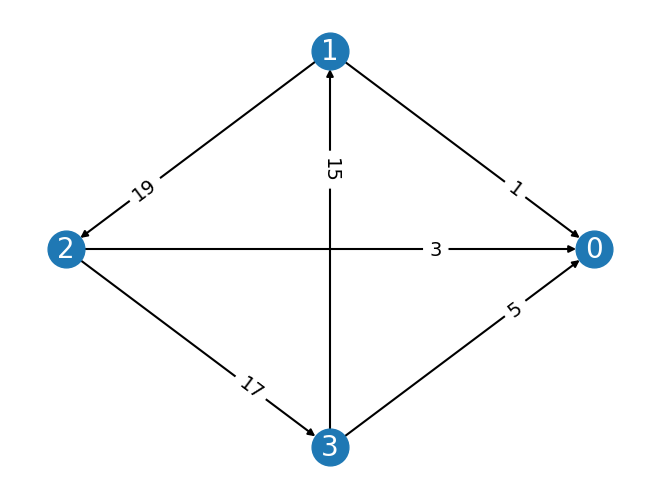

Smith-Minimax winner is {1}



True

In [38]:
smpi = Profile([[0, 1, 2, 3], [0, 2, 3, 1], [1, 2, 0, 3], [2, 0, 3, 1], [2, 3, 1, 0], [3, 0, 1, 2],[1,0,2,3]], rcounts=[3, 4, 15, 1, 11, 17,6])

has_positive_involvement_violation(smpi, smith_minimax, coalition_size = 6, verbose = True)